In [3]:
! pip install Pillow matplotlib timm


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
print(sys.executable)

C:\Users\sra\OneDrive - Hexagon\Desktop\Hands on AI\langflow_test_lab\.env_google\Scripts\python.exe


In [7]:
from transformers import DetrImageProcessor, DetrForObjectDetection, pipeline
import torch
from PIL import Image
import requests
# Specify the inference task
object_detection = pipeline(
    task="object-detection",
    model="facebook/detr-resnet-50",
)

Loading weights:   0%|          | 0/530 [00:00<?, ?it/s]

DetrForObjectDetection LOAD REPORT from: facebook/detr-resnet-50
Key                                                            | Status     |  | 
---------------------------------------------------------------+------------+--+-
model.backbone.model.layer4.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer3.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer2.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 
model.backbone.model.layer1.0.downsample.1.num_batches_tracked | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
The image processor of type `DetrImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


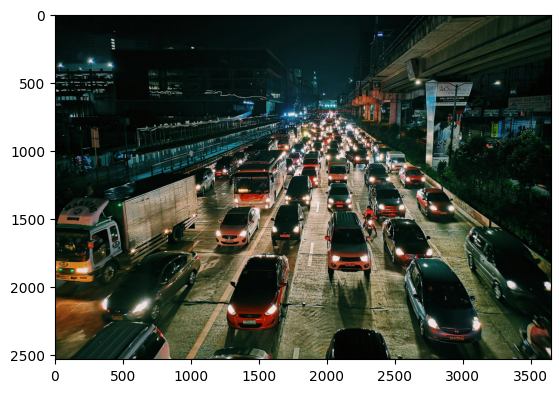

In [8]:
import matplotlib.pyplot as plt
image = Image.open("images/image_2.jpeg")
plt.imshow(image)

In [9]:
results = object_detection(image)
for result in results:
  result.pop("box")
print(results)
    

[{'score': 0.6827951073646545, 'label': 'car'}, {'score': 0.9888834357261658, 'label': 'car'}, {'score': 0.5736234188079834, 'label': 'person'}, {'score': 0.8973751068115234, 'label': 'car'}, {'score': 0.5430497527122498, 'label': 'person'}, {'score': 0.9305409789085388, 'label': 'bicycle'}, {'score': 0.5767276287078857, 'label': 'person'}, {'score': 0.6837701201438904, 'label': 'truck'}, {'score': 0.5526695251464844, 'label': 'person'}, {'score': 0.8177577257156372, 'label': 'person'}, {'score': 0.5697546601295471, 'label': 'person'}, {'score': 0.9986829161643982, 'label': 'car'}, {'score': 0.8654943704605103, 'label': 'car'}, {'score': 0.9664639830589294, 'label': 'car'}, {'score': 0.9624624252319336, 'label': 'person'}, {'score': 0.6399006247520447, 'label': 'person'}, {'score': 0.7589386701583862, 'label': 'person'}, {'score': 0.9933926463127136, 'label': 'car'}, {'score': 0.9920656085014343, 'label': 'car'}, {'score': 0.9201856255531311, 'label': 'car'}, {'score': 0.99224758148193

In [10]:
from collections import Counter
counts = Counter(item["label"] for item in results)
unique = [{"label":label, "count":count} for label, count in counts.items()]
text = 'The image contains'
for x in unique:
  text += f" ,{x['count']} {x['label']}"
print(text)

The image contains ,29 car ,21 person ,2 bicycle ,5 truck ,1 bus


In [11]:
from transformers import pipeline
narrator = pipeline(
    task="text-to-speech",
    model="suno/bark-small",
)
narrated_text = narrator(text)
print(narrated_text["sampling_rate"])

Loading weights:   0%|          | 0/542 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.1.weight to fine_acoustics.lm_heads.0.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.2.weight to fine_acoustics.lm_heads.1.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_layers.3.weight to fine_acoustics.lm_heads.2.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie fine_acoustics.input_embeds_l

24000


In [95]:
#!pip install --upgrade transformers scipy
! pip install datasets soundfile librosa

  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached pooch-1.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-1.0.0-cp312-abi3-win_amd64.whl.metadata (5.6 kB)
Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.1.0-py3-none-any.whl (23 kB)
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 55.6 MB/s  0:00:00
   ---------------------------------------- 0.0/39.2 MB ? eta -:--:--
   ----------------- ---------------------- 16.8/39.2 MB 79.2 MB/s eta 0:00:01
   -------------------------------- ------- 31.5/39.2 MB 73.6 MB/s eta 0:00:01
   ---------------------------------------  39.1/39.2 MB 73.7 MB/s eta 0:00:01
   ------------------------------------

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import scipy
scipy.io.wavfile.write("bark_out.wav", rate=narrated_text["sampling_rate"], data=narrated_text["audio"])

In [13]:
from IPython.display import Audio as IPythonAudio

IPythonAudio(
    narrated_text["audio"],
    rate=narrated_text["sampling_rate"]
)